In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Polynomial Regression

In [2]:
# (x - 1)^2
X_train = np.array([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = np.array([9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81])

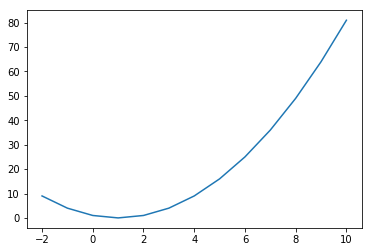

In [3]:
plt.plot(X_train, y_train)

In [4]:
X_train = X_train.reshape(len(X_train), 1)
y_train = y_train.reshape(len(y_train), 1)

In [5]:
class PolynomialFeatures:
    degree = 2
    features = 0
    
    def fit_transform(self, data):
        self.fit(data)
        
        return self.transform(data)
    
    def fit(self, data):
        self.features = data.shape[1]
    
    def transform(self, data):
        if self.features == 0:
            raise Exception('Features is not available')

        data_len = len(data)
        output = one_arr = np.ones((data_len), np.float)
        
        for i in range(self.features):
            output = np.concatenate((output, one_arr*(data[:,i])))
        
        for i in range(self.features):
            output = np.concatenate((output, one_arr*(data[:,i]**2)))
            
        for i in range(self.features):
            for j in range(i + 1, self.features):
                output = np.concatenate((output, one_arr*(data[:,i]*data[:,j])))
        
        new_features = np.int((self.features**2 + 3*self.features)/2) + 1
        
        return output.reshape((new_features, data_len)).T


In [6]:
poly = PolynomialFeatures()
X_train = poly.fit_transform(X_train)

In [7]:
from linear_regression import LinearRegression

In [8]:
model = LinearRegression()
model.fit(X_train, y_train, 2000, 0.00023)

Epoch 99 cost: 4.166633605861406
Epoch 199 cost: 3.7571312883177472
Epoch 299 cost: 3.391514019682292
Epoch 399 cost: 3.0649208665235936
Epoch 499 cost: 2.773035602490488
Epoch 599 cost: 2.512025427430742
Epoch 699 cost: 2.278486589971487
Epoch 799 cost: 2.0693961355180095
Epoch 899 cost: 1.8820690893288028
Epoch 999 cost: 1.7141204621398385
Epoch 1099 cost: 1.5634315348544765
Epoch 1199 cost: 1.4281199400757005
Epoch 1299 cost: 1.3065131126123137
Epoch 1399 cost: 1.197124729318208
Epoch 1499 cost: 1.0986338014151908
Epoch 1599 cost: 1.0098661204173782
Epoch 1699 cost: 0.929777792462895
Epoch 1799 cost: 0.8574406257490191
Epoch 1899 cost: 0.7920291622879175
Epoch 1999 cost: 0.7328091687315632


In [9]:
model.predict(poly.transform(np.array([[11]])))

array([[98.03961665]])

## Polynomial Logistic Regression

In [10]:
X_train2 = np.array([
    [1, 1],
    [0, 0],
    [1, 2],
    [0.5, 0.86],
    [-1, 1],
    [0.5, 1],
    [0, -0.5],
    [0.5, 0],
    [-1, -1],
    [0.5, 0.5],
])
y_train2 = np.array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1])
y_train2 = y_train2.reshape((len(y_train2), 1))

In [11]:
poly2 = PolynomialFeatures()
X_train2 = poly2.fit_transform(X_train2)

In [12]:
from logistic_regression import LogisticRegression

In [13]:
model2 = LogisticRegression()
model2.fit(X_train2, y_train2, 100, 10)

Epoch 1 cost: 0.125
Epoch 100 cost: 0.0032257719584505066


In [14]:
model2.predict(poly2.transform(np.array([[0.4, 0.4]])))

array([[0.99988154]])